# Importing the libraries

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [124]:
Importing the dataset

SyntaxError: invalid syntax (1008221344.py, line 1)

In [135]:
dataset = pd.read_excel('customer_churn_large_dataset.xlsx')

In [136]:
dataset.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [137]:
dataset.shape

(100000, 9)

In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [139]:
dataset.drop(['CustomerID','Name','Location'],axis=1,inplace=True)

# Checking Null values

In [140]:
dataset.isnull().sum()

Age                           0
Gender                        0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: >

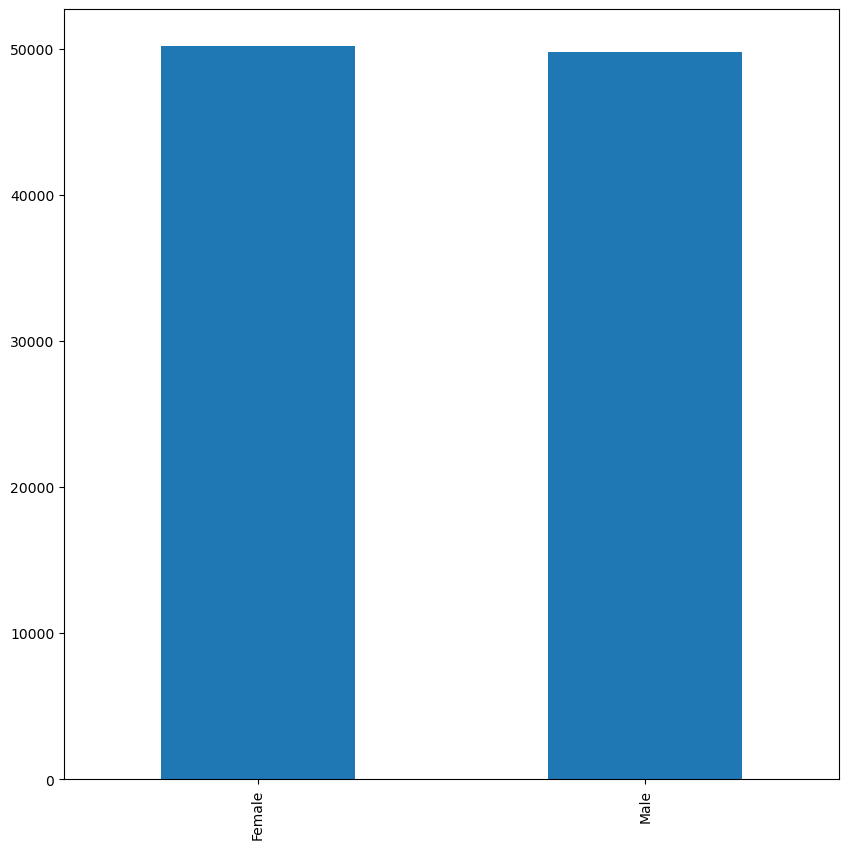

In [141]:
dataset['Gender'].value_counts().plot(kind='bar',figsize=(10,10))

In [142]:
dataset['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

<Axes: >

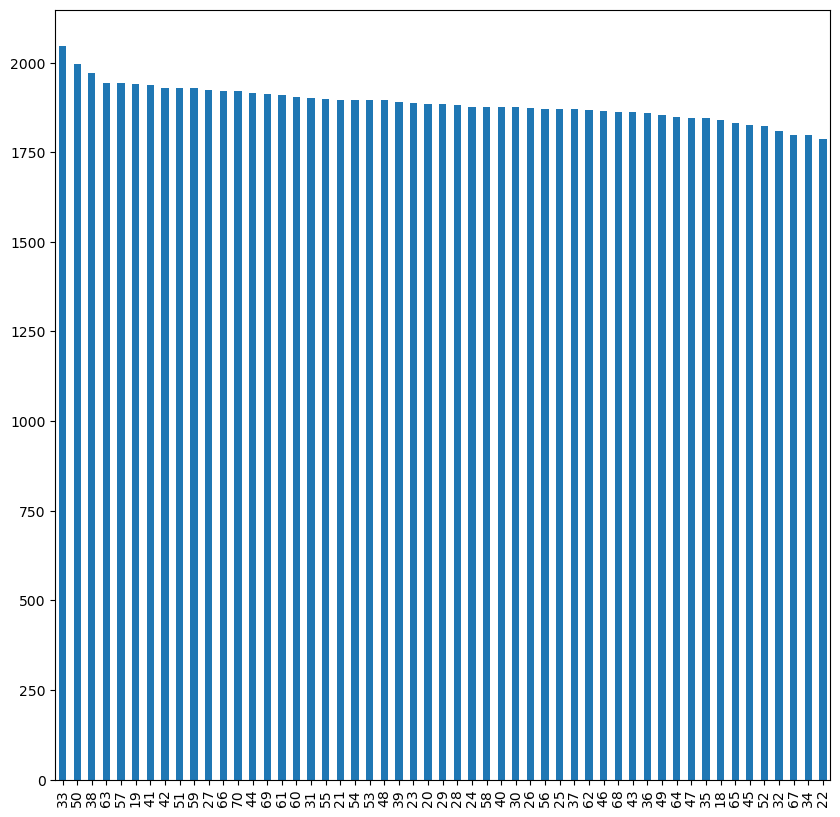

In [143]:
dataset['Age'].value_counts().plot(kind='bar',figsize=(10,10))

In [144]:
dataset['Age'].value_counts()

33    2046
50    1996
38    1970
63    1942
57    1942
19    1941
41    1939
42    1930
51    1929
59    1928
27    1924
66    1922
70    1921
44    1916
69    1912
61    1909
60    1904
31    1901
55    1900
21    1897
54    1896
53    1895
48    1895
39    1891
23    1887
20    1886
29    1885
28    1881
24    1876
58    1876
40    1875
30    1875
26    1874
56    1872
25    1871
37    1870
62    1867
46    1865
68    1863
43    1863
36    1859
49    1854
64    1848
47    1847
35    1845
18    1839
65    1833
45    1827
52    1824
32    1810
67    1798
34    1797
22    1787
Name: Age, dtype: int64

In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Subscription_Length_Months  100000 non-null  int64  
 3   Monthly_Bill                100000 non-null  float64
 4   Total_Usage_GB              100000 non-null  int64  
 5   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.6+ MB


In [146]:
dataset.columns

Index(['Age', 'Gender', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn'],
      dtype='object')

In [147]:
obj=['Age', 'Gender', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn']
for i in obj:
    print(i, len(dataset[i].unique()))

Age 53
Gender 2
Subscription_Length_Months 24
Monthly_Bill 7001
Total_Usage_GB 451
Churn 2


# Label Encoding

In [148]:
dataset['Gender'].replace('Male',0,inplace=True)
dataset['Gender'].replace('Female',1,inplace=True)

In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  int64  
 2   Subscription_Length_Months  100000 non-null  int64  
 3   Monthly_Bill                100000 non-null  float64
 4   Total_Usage_GB              100000 non-null  int64  
 5   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 4.6 MB


# Correlation

In [150]:
correlation=dataset.corr()

<Axes: >

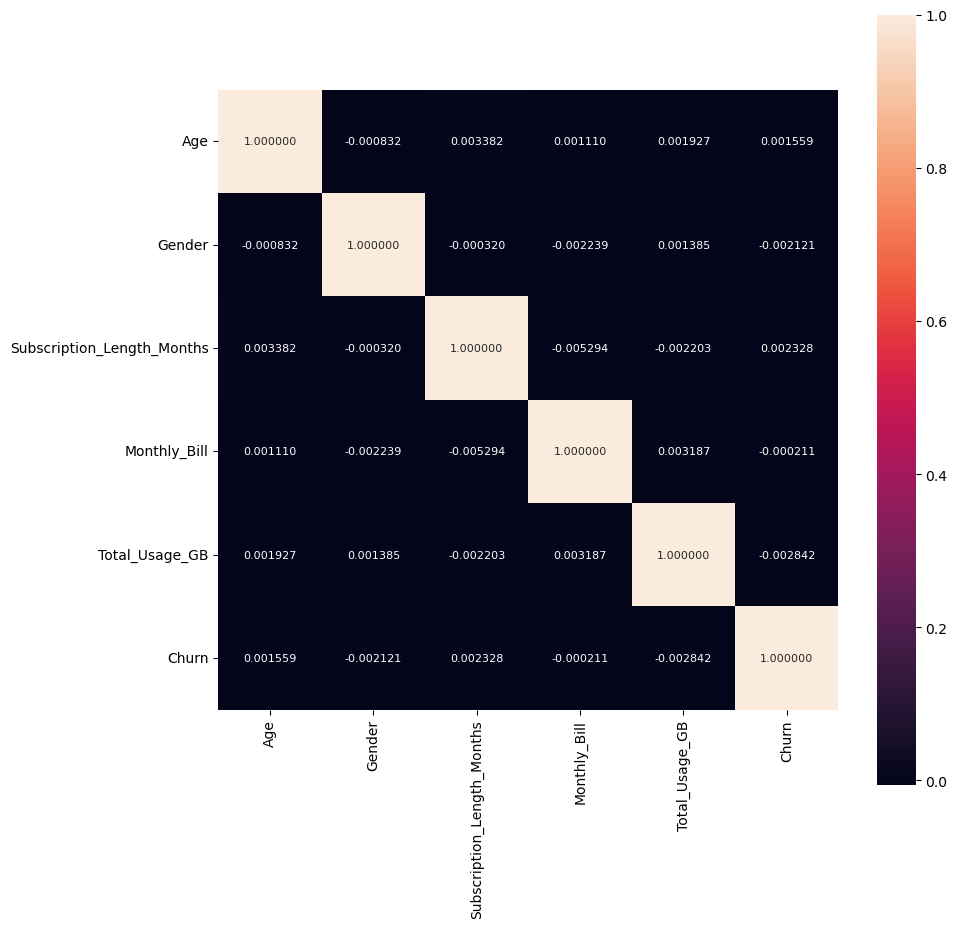

In [151]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='1f',annot_kws={'size':8},annot = True)

In [152]:
dataset.corr()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,1.000000,-0.000832,0.003382,0.001110,0.001927,0.001559
Gender,-0.000832,1.000000,-0.000320,-0.002239,0.001385,-0.002121
Subscription_Length_Months,0.003382,-0.000320,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001110,-0.002239,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,0.001927,0.001385,-0.002203,0.003187,1.000000,-0.002842
Churn,0.001559,-0.002121,0.002328,-0.000211,-0.002842,1.000000


In [153]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  int64  
 2   Subscription_Length_Months  100000 non-null  int64  
 3   Monthly_Bill                100000 non-null  float64
 4   Total_Usage_GB              100000 non-null  int64  
 5   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 4.6 MB


In [154]:
dataset.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,0,17,73.36,236,0
1,62,1,1,48.76,172,0
2,24,1,5,85.47,460,0
3,36,1,3,97.94,297,1
4,46,1,19,58.14,266,0


In [155]:
X=dataset.drop('Churn',axis=1)
y=dataset['Churn']

In [156]:
X.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,0,17,73.36,236
1,62,1,1,48.76,172
2,24,1,5,85.47,460
3,36,1,3,97.94,297
4,46,1,19,58.14,266


In [157]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

# Splitting the dataset into the Training set and Test set

In [158]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [159]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((75000, 5), (25000, 5), (75000,), (25000,))

# Feature Scaling

In [160]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Training with every classification model on the Training set

In [161]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report,auc

In [162]:
model_dict = {}

model_dict['Logistic regression']= LogisticRegression (solver='liblinear', random_state=49)
model_dict['KNN Classifier' ] = KNeighborsClassifier ()
model_dict[ 'Decision Tree Classifier' ] = DecisionTreeClassifier (random_state=49)
model_dict ['Random Forest Classifier'] = RandomForestClassifier (random_state=49)
model_dict ['AdaBoost Classifier' ] = AdaBoostClassifier (random_state=49)
model_dict ['Gradient Boosting Classifier' ] = GradientBoostingClassifier (random_state=49)
model_dict ['XGB Classifier'] = XGBClassifier (random_state=49)

In [163]:
def model_test (X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict (X_test)
    accuracy = accuracy_score (y_test,y_pred)
    print('====================================={}======================================='.format(model_name))
    print('Score is : {}'.format (accuracy))
    print()

In [164]:
for model_name, model in model_dict.items ():
    model_test(X_train, X_test, y_train, y_test, model,model_name)

=====================================Logistic regression=======================================
Score is : 0.49936

=====================================KNN Classifier=======================================
Score is : 0.5006

=====================================Decision Tree Classifier=======================================
Score is : 0.4982

=====================================Random Forest Classifier=======================================
Score is : 0.49968

=====================================AdaBoost Classifier=======================================
Score is : 0.49596

=====================================Gradient Boosting Classifier=======================================
Score is : 0.49592

=====================================XGB Classifier=======================================
Score is : 0.49948



# Training the K-NN model on the Training set

In [173]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Making the Confusion Matrix

In [174]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6410 6192]
 [6293 6105]]


0.5006

# Predicting the Test set results

In [175]:
y_pred=classifier.predict(X_test)
print(y_pred)

[0 1 1 ... 1 0 1]


# Predicting the new result

In [176]:
print(classifier.predict(sc.transform([[63,0,17,73.36,236]])))
if (model== 0):
    print("NO")
else:
    print("YES")

[0]
YES


/home/santhu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Saving the trained model

In [177]:
import pickle

In [178]:
pickle.dump(classifier,open('churn.pkl','wb'))

In [179]:
pickle.dump(sc,open('sc.pkl','wb'))